<a href="https://colab.research.google.com/github/richards-okiemute/richards-okiemute/blob/main/E_news_Express_A_B_Testing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-news Express A/B Testing Analysis**

### *--Richards Okiemute*

## Problem Definition

* E-News Express is an online news portal company which serves her subscribers with online news content.
Visitors accessing the company's website perform different actions based on their personal interest. The company intends to analyze these interests in order to find out which feature will be effective or not. They plan on analyzing users' responses to two (2) variants of a product to decide which is more effective. They intend to discover which feature attracts users interest based on a particular metric using A/B Testing methodology.


## Objectives


> Performing Statistical analysis of business data. 
  - Explore the dataset and extract insights from the data.

> Use the Insights obtained from Exploratory Data Analysis (EDA) to answer the following Business Questions;
  - Do the users spend more time on the new landing page than the old landing page?
  - Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page    greater than the conversion rate for the old page?
  - Does the converted status depend on the preferred language? 
  - Is the mean time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests i.e* **α = 5%.**



## Data Dictionary:

**user_id** - This represents the user ID of the person visiting the website.

**group** - This represents whether the user belongs to the first group (control) or the second group (treatment).

**landing_page** - This represents whether the landing page is new or old.

**time_spent_on_the_page** - This represents the time (in minutes) spent by the user on the landing page.

**converted** - This represents whether the user gets converted to a subscriber of the news portal or not.

**language_preferred** - This represents the language chosen by the user to view the landing page.


In [ ]:
#Importing the necessary libraries
import numpy as np                    #for numerical computation  
import pandas as pd                   #for dataframe and series manipulation (data wrangling)
import matplotlib.pyplot as plt       #for data visualization
import seaborn as sns                 #for data visualization
import scipy.stats as stats          #for statistical analysis
from scipy.stats import levene        #for variance analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd  #for mulitple test comparison
from scipy.stats import chi2_contingency  #for chi_square computation
from statsmodels.stats.proportion import proportions_ztest  # for computing proportions_ztest
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set1')

In [ ]:
#loading data from local work environment
from google.colab import files
file = files.upload()
file

Saving abtest.csv to abtest (1).csv


{'abtest.csv': b'user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred\r\n546592,control,old,3.48,no,Spanish\r\n546468,treatment,new,7.13,yes,English\r\n546462,treatment,new,4.4,no,Spanish\r\n546567,control,old,3.02,no,French\r\n546459,treatment,new,4.75,yes,Spanish\r\n546558,control,old,5.28,yes,English\r\n546448,treatment,new,5.25,yes,French\r\n546581,control,old,6.53,yes,Spanish\r\n546461,treatment,new,10.71,yes,French\r\n546548,control,old,2.08,no,English\r\n546588,control,old,6.21,yes,Spanish\r\n546546,control,old,2.58,yes,English\r\n546491,treatment,new,5.86,yes,Spanish\r\n546478,treatment,new,6.03,yes,French\r\n546578,control,old,8.72,yes,Spanish\r\n546466,treatment,new,6.27,yes,Spanish\r\n546443,treatment,new,8.73,no,English\r\n546555,control,old,0.4,no,English\r\n546493,control,old,10.3,yes,English\r\n546549,control,old,3.88,yes,English\r\n546560,control,old,2.66,no,French\r\n546584,control,old,7.03,yes,Spanish\r\n546450,treatment,new,3.65,no,English\r

In [ ]:
enews = pd.read_csv('abtest.csv')

In [ ]:
#viewing the first five (5) rows of the data

enews.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


**Comment**

The data contains 6 columns with headings listed below;
- User Id
- Group
- Landing Page
- Time Spent on the Page
- Converted and
- Language Preferred

## Exploring the data to understand its structure and uncover data information
- Check for the Shape of the data

- Check statistical description of the data
 
- Understand the data structure and data types.
 
- Space in memory occupied by the data. 

In [ ]:
enews.shape
print('The data has', enews.shape[0], 'rows and', enews.shape[1], 'columns')

The data has 100 rows and 6 columns


In [ ]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Comment**
- The data contains no missing values
- Data types present are: float64, int64, object
  - user_id: int64
  - time_spent_on_the_page: float64
  - group, landing_page, converted, language_preferred: object
- Overall, there are four (4) objects, one (1) float64, and one (1) int64 data types available in the dataset
- Memory Usage : approx. 4.8 KB

In [ ]:
#Statistical Information of the data. descriptive analysis of numerical variables.
enews.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Comment**
- time_spent_on_the_page: 
  - Users spend an average time of 5.3778m on the site.
  - There is an approximate standard deviation of 2.3782m between the time users spent on the site.
  - Maximum time spent on the site: 10.71m
  - Minimum time spent on the site: 0.19s
  - 75% of the users spend about 7m on the site.
  
*m = minutes*

*s = seconds*
  

## Exploratory Data Analysis (EDA)

- Univariate Analysis
- Bivariate Analysis
- Visualisations

## Univariate Analysis

In [ ]:
#viewing column names
enews.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

In [ ]:
#checking the categorical values in the group column
enews['group'].unique()

array(['control', 'treatment'], dtype=object)

In [ ]:
enews['group'].value_counts()

treatment    50
control      50
Name: group, dtype: int64

**Comment**

- The group is divided into control and treatment.
- Each category has 50 values.

In [ ]:
#checking the categorical values in the landing page column
enews['landing_page'].unique()

array(['old', 'new'], dtype=object)

In [ ]:
enews['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


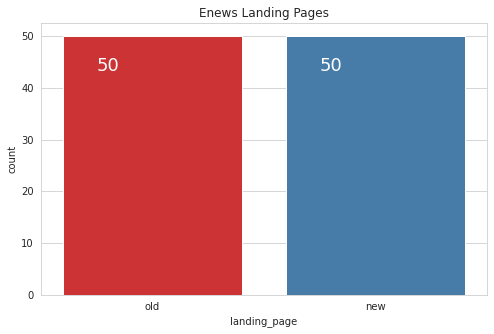

In [ ]:
#creating visualization.
plt.figure(figsize=(8,5))
ax = sns.countplot(enews['landing_page'])
plt.title('Enews Landing Pages')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

**Comment**

- The  landing page is divided into old and new.
- Each category has 50 values.

In [ ]:
#checking the categorical values in the converted column
enews['converted'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
enews['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


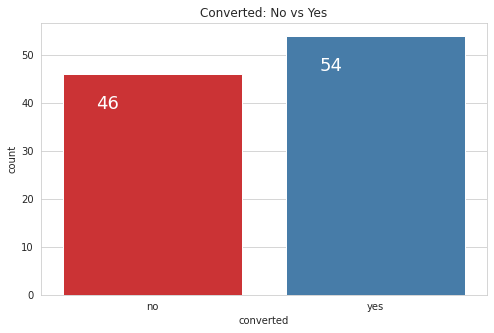

In [ ]:
#creating visualization.
plt.figure(figsize=(8,5))
ax = sns.countplot(enews['converted'])
plt.title('Converted: No vs Yes')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

**Comment**

- The converted column has both **'yes'** and **'no'** categories.

- 54 of the users were converted to subscribers while the remaining 46 are yet to be converted.

In [ ]:
#checking the categorical values in the converted column
enews['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

In [ ]:
enews['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


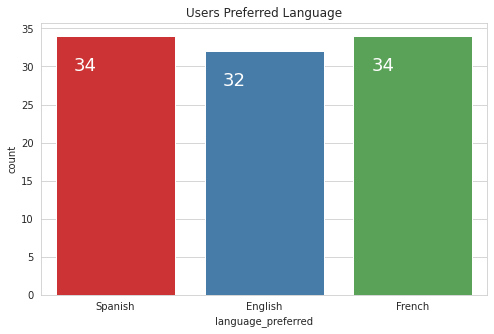

In [ ]:
#creating visualization.
plt.figure(figsize=(8,5))
ax = sns.countplot(enews['language_preferred'])
plt.title('Users Preferred Language')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

**Comment**

- The language column contains three (3) categories; Spanish, French and English.

- Users preferred language distribution are.
  
  - Spanish    **34** Users
  
  - French     **34** Users
  
  - English    **32** Users

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


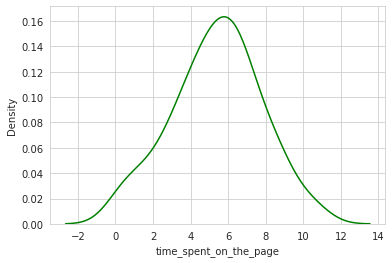

In [ ]:
sns.distplot(enews['time_spent_on_the_page'], bins = 'auto', color='g', label='Time Spent On The Page',  hist=False)

**Comment**

The time spent on the site is uniformly distributed among the users.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


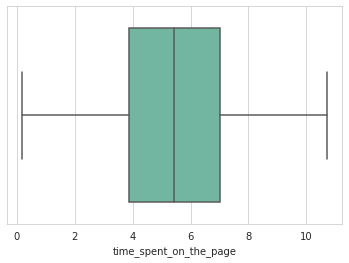

In [ ]:
#using boxplot to check for outliers
sns.boxplot(enews['time_spent_on_the_page'],orient='v', palette="Set2")

**Comment**

No outlier exists in the time spent on the site

## Bivariate Analysis

- Users Converted vs Time Spent on the Page
- Users Preferred Language vs Time Spent on the Page
- User Group vs Time Spent on the Page
- Landing Page vs Time Spent on the Page
- Correlation Heatmap

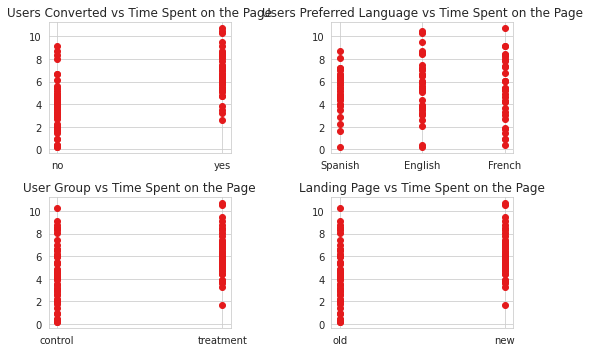

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(8,5))
axes[0,0].scatter(enews['converted'],enews['time_spent_on_the_page'])
axes[0,1].scatter(enews['language_preferred'],enews['time_spent_on_the_page'])
axes[1,0].scatter(enews['group'],enews['time_spent_on_the_page'])
axes[1,1].scatter(enews['landing_page'],enews['time_spent_on_the_page'])
axes[0,0].set_title('Users Converted vs Time Spent on the Page')
axes[0,1].set_title('Users Preferred Language vs Time Spent on the Page')
axes[1,0].set_title('User Group vs Time Spent on the Page')
axes[1,1].set_title('Landing Page vs Time Spent on the Page')
plt.tight_layout()


**Comment**

**Users Converted vs Time Spent on the Page**
- Converted Users spend more time on the page than Non-Converted Users
- Most Converted Users average around 5.7 - 7.8 mins on the pages while Nonn-Converted Users average around 2.4 - 4mins

**Users Preferred Language vs Time Spent on the Page**

- **Spanish Users**: Spend less time on the page.

- **French and  English Users**: Spend the most time on the page

**User Group vs Time Spent on the Page**

**Treatment Group**
 - the treatment group spend the most time on the site.
 - They spend a maximum time greater than the Users on the Control group 
 
**Control Group**
  -  Some Users spend a minimum time less than 1 minute.
  - Average time concentration is about 3.8 - 4.5 mins.
  - Maximum time spent on the pages by these users is less than that of the treament group



**Landing Page vs Time Spent on the Page**
- More time is spent on the new landing page than the old.
- users seem to like certain features of this new page more.

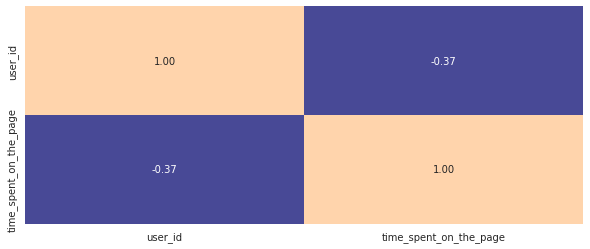

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(enews.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cbar=False, cmap="icefire")
plt.show()
plt.tight_layout()

**Comment**

- There appears not to be any strong correlation between the users and the time spent on the pages.

Text(0.5, 1.0, 'users vs time_spent_on_the_page')

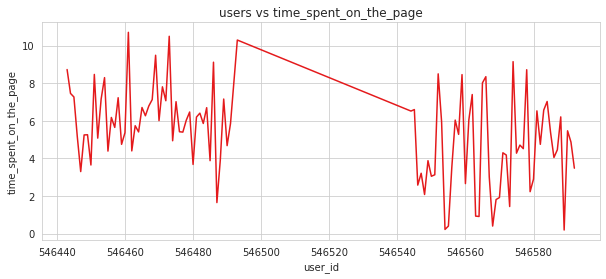

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=enews, x= 'user_id', y = 'time_spent_on_the_page')
plt.title('users vs time_spent_on_the_page')

**Comment**

- No unique pattern or trend in the time spent on the pages amongst users

Text(0.5, 1.0, 'users vs time_spent_on_the_page')

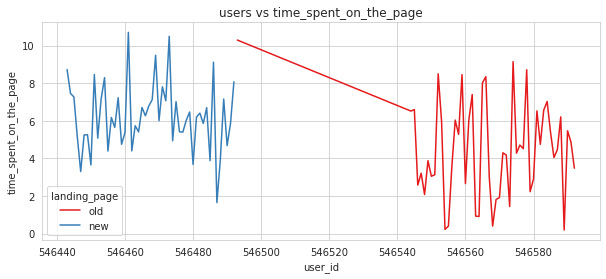

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=enews, x= 'user_id', y = 'time_spent_on_the_page', hue = 'landing_page')
plt.title('users vs time_spent_on_the_page')

**Comment**

- There exist an haphazard trend in the time spent by the users on both pages.
- The new page has the overall highest and cummulative time spent on the page.

Text(0.5, 1.0, 'users vs time_spent_on_the_page')

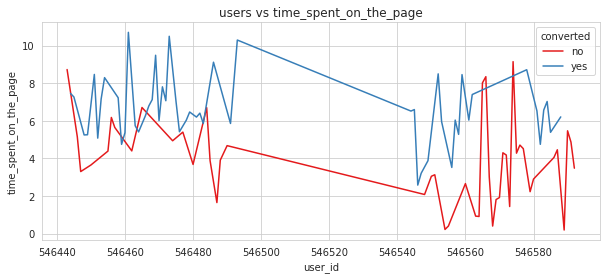

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=enews, x= 'user_id', y = 'time_spent_on_the_page', hue = 'converted')
plt.title('users vs time_spent_on_the_page')

**Comment**

- The Converted Users maintained an higher trend in the time spent on the page than the Non-Converted Users

## Business Insights and Statistical Analysis

#### Business Questions:

- Do the users spend more time on the new landing page than the old landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the mean time spent on the new page same for the different language users?

#### **STATISTICAL ANALYSIS:**

- Statistical analysis will be performed using the following parameters.
  - The number of users (n) = 100 (treated as a sample size)
  - Alpha level = 0.05. i.e α = 5%
  - Standard deviation of time spent on page = 2.378166 **(retrieved from enews.describe() table)**
  - Variable mean: taken from respective crosstabs for each variables
  - Z Score to be determined.
  - p-value to be determined.
  
  

**1.         Do the users spend more time on the new landing page than the old landing page?**

In [ ]:
def reject_or_not(p_value): #creating a function to tell us whether to reject or fail to reject
# print the conclusion based on p-value
    if p_value < 0.05:
        print(f'SInce the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
    else:
        print(f'SInce the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

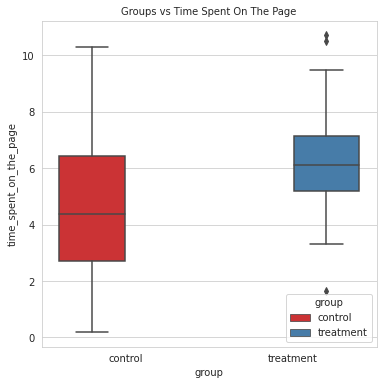

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x= "group", y = 'time_spent_on_the_page' , data = enews, hue = 'group')
ax.set_title("Groups vs Time Spent On The Page", fontsize=10)
plt.show()

enews.groupby('group')['time_spent_on_the_page'].mean()

**Comment**

**The treatment group has the highest avaerage, minimum and overall maximum time spent on the page.**

*The Treatment group spent the most time on the page*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


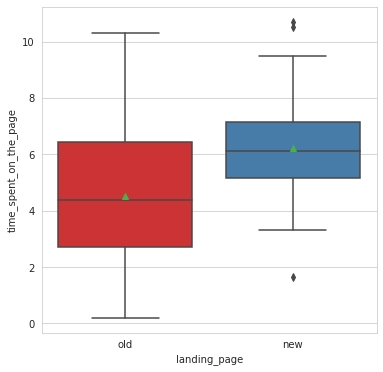

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(enews["landing_page"], enews["time_spent_on_the_page"], showmeans=True)
plt.show()
enews.groupby("landing_page")['time_spent_on_the_page'].mean()

**Comment**

**The users spend more time on the new landing page compared to the old landing page**

In [ ]:
enews.groupby('landing_page', axis = 0 ).sum()

,user_id,time_spent_on_the_page
landing_page,,
new,27323375,311.16
old,27328325,226.62


**Comment**

- Users spend a total of 311.16 minutes on the new page
- Users spend a total of 226.62 minutes on the old page.

**Insights**

- Users prefer the new landing page
- They spend more time on the new landing page


 **STATISTICAL ANALYSIS:**

In [ ]:
enews.groupby('landing_page', axis = 0 ).mean() #calculating the mean of user time spend on different pages

,user_id,time_spent_on_the_page
landing_page,,
new,546467.5,6.2232
old,546566.5,4.5324


### Hypothesis Fomulation:

**Null Hypothesis**

>$H_0$ = Users do not spend more time on the new landing page than on the old landing page.

 - $µ_0$ = $µ_a$

**Alternate Hypothesis**

>$H_a$ = Users spend more time on the new landing page than on the old landing page

 - $µ_a$ ≠ $µ_0$

In [ ]:
# Extracting time spent by group users
treat_time = np.array(enews[enews.group == 'treatment'].time_spent_on_the_page)  
control_time = np.array(enews[enews.group == 'control'].time_spent_on_the_page)

# Computing an Independent t-test
ttest, p_value  = stats.ttest_ind(treat_time,control_time)

print("The P-value is",p_value)

The P-value is 0.000263224705619001


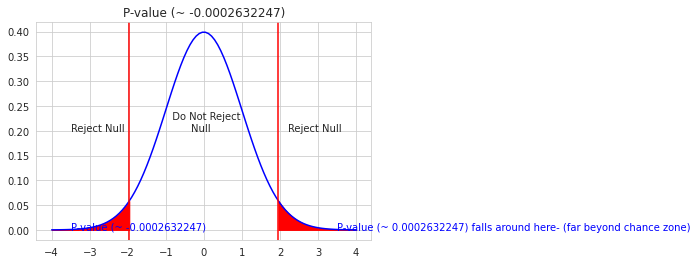

In [ ]:
# import the required function
from scipy.stats import norm

# find the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1), c='b') # plot the pdf of the normal distribution
plt.axvline(x = critical_val1, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val1, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.axvline(x = critical_val2, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(-4, critical_val2, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (2.2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('P-value (~ 0.0002632247) falls around here- (far beyond chance zone)', (3.5, 0.0002), c='b')
plt.annotate('P-value (~ -0.0002632247)', (-3.5, -0.0002), c='b')
plt.title('P-value (~ -0.0002632247)')
plt.show() # display the plot

In [ ]:
reject_or_not(0.000263224705619001)

SInce the p-value 0.000263224705619001 is less than the level of significance, we reject the null hypothesis.


**Statistical Analysis Interpretation**

- We **Reject the Null Hypothesis** since the Two tailed P_value (0.000263224705619001) is lesser than the significance level (α =0.05). 

- **Therefore: Users really spend more time on the new page than one the old page**

**2.  Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

In [ ]:
#Using pandas crosstab to check for converted users' preferred landing page
pd.crosstab(enews['converted'], enews['landing_page'])

landing_page,new,old
converted,,
no,17,29
yes,33,21


**Comment**

- 33 out of 50 Users were converted on the new landing page.
- 21 ou of 50 users where converted on the old landing page.

**Observation/Insights**

- The new landing page converted more 12 more users than the old landing page.
- The new landing page has 66% chance of converting users
- The old landing page has 42% conversion users rate

In [ ]:
pd.crosstab(enews['converted'], enews['landing_page']).mean()

landing_page
new    25.0
old    25.0
dtype: float64

In [ ]:
# computing the number of users who visited the new page.
new_page_yes = enews[enews["converted"]=='yes'].converted.value_counts()
# computing the number of users who visited the old page.
new_page_no = enews[enews["converted"]=='no'].converted.value_counts()

#number of users in the new page
new = enews.landing_page.value_counts()["new"]

# number of users in the old page
old = enews.landing_page.value_counts()["old"]


In [ ]:
print('the number of users who visited the new page: ', new_page_no,'\n''\n',
      'the number of users who visited the old page: ',new_page_yes,'\n''\n',
    'number of users in the new page: ',new,'\n''\n'
      'number of users in the old page: ',old), '\n''\n'
print(f' the proportion of new and old in landing_page are {round(54/100,2)}, {round(46/100,2)} respectively')

the number of users who visited the new page:  no    46
Name: converted, dtype: int64 

 the number of users who visited the old page:  yes    54
Name: converted, dtype: int64 

 number of users in the new page:  50 

number of users in the old page:  50
 the proportion of new and old in landing_page are 0.54, 0.46 respectively


### Hypothesis Fomulation:

**Null Hypothesis**

 >$H_0:$ = Conversion rate for the new page is equal than the old page.

 - $µ new = $µ old

**Alternate Hypothesis**

>$H_a:$ = Conversion rate for the new page is greater than or equal the old page
 - $µ new => $µ old
 
'landing_page' and 'converted' are both categorical features.

**Computing P-Value based on different proportions**

In [ ]:
# set the counts of converted

counts = np.array([46, 54])

# set the sample sizes
props = np.array([50,100])

# find the p-value
test_stat, p_value = proportions_ztest(counts, props)
print('The p-value is ' + str(round(p_value,7)))

The p-value is 3.3e-06


In [ ]:
reject_or_not( 3.3e-06)

SInce the p-value 3.3e-06 is less than the level of significance, we reject the null hypothesis.


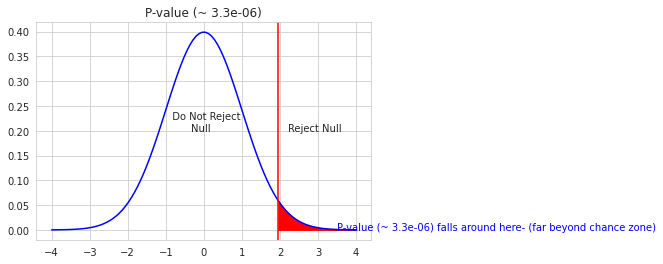

In [ ]:
ritical_val1 = norm.ppf(1-(0.05))
critical_val2 = norm.ppf(0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1), c='b') # plot the pdf of the normal distribution
plt.axvline(x = critical_val1, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val1, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
x1 = np.linspace(-4, critical_val2, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.annotate('Reject Null', (2.2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('P-value (~ 3.3e-06) falls around here- (far beyond chance zone)', (3.5, 0.0002), c='b')
plt.title('P-value (~ 3.3e-06)')
plt.show() # display the plot

**Statistical Analysis Interpretation**

-  **We Reject the Null Hypothesis** since the Two tailed P_value (3.3e-06) is lesser than the significance level (α =0.05). 

- **Therefore: Conversion rate for the new page is greater than or equal the old page**

**3.  Does the converted status depend on the preferred language?**

In [ ]:
#Using pandas crosstab to check for converted users' preferred language
pd.crosstab(enews['converted'], enews['language_preferred'])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


**Comment**

- English Users were the most converted.
- The second most converted users are Spaniards/Spanish speaking Users.
- Only 15 of the 34 French speaking users were converted

**Observation/Insights**
- Most users preferred the english version of the site
- Most subscribers are English natives/speakers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


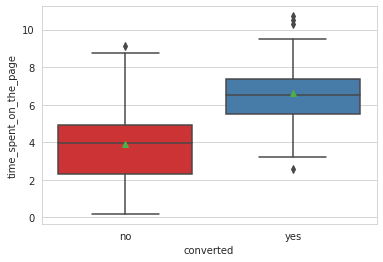

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

In [ ]:
sns.boxplot(enews["converted"], enews["time_spent_on_the_page"], showmeans=True,)
plt.show()
enews.groupby('converted')["time_spent_on_the_page"].mean()

**Comment**
- The converted users spend more time on the page than the non converted.

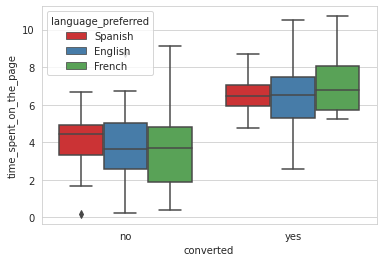

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.boxplot(y="time_spent_on_the_page", x="converted", hue = 'language_preferred',  data=enews)
plt.show()
plt.tight_layout()

**Comment**

- The boxplot above shows that French and English converted speakers spend more time on the page than any other group i.e the non converted language speakers

In [ ]:
#mean of the converted/Non-converted language speakers
pd.crosstab(enews['converted'], enews['language_preferred']).mean()

language_preferred
English    16.0
French     17.0
Spanish    17.0
dtype: float64

In [ ]:
#count of the converted/Non-converted users
enews.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
#count of the languages preferred by users
enews.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

### Hypothesis Fomulation:

**Null Hypothesis**

>$H_0$ = Converted status depend on language preference.

 - $µ_E$ = $µ_F$ = $µ_S$

**Alternate Hypothesis**

>$H_a$ = Converted status depend on language preference.

 - Atleast one µ is different

In [ ]:
#preparing the contingency table
contigency_table = pd.crosstab(enews['converted'],enews['language_preferred'])
chi, p_value, dfn, expected = chi2_contingency(contigency_table)
p_value

0.21298887487543447

In [ ]:
reject_or_not(0.21298887487543447)

SInce the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


**Statistical Analysis Interpretation**

-  **We Reject the Null Hypothesis** since the Two tailed P_value (0.21298887) is greater than the significance level (α =0.05). 

- **Therefore: Converted status depend on language preference**

**4.  Is the mean time spent on the new page same for the different language users?**

In [ ]:
pd.crosstab(enews['language_preferred'], enews['landing_page'], enews['time_spent_on_the_page'], aggfunc = np.mean)

landing_page,new,old
language_preferred,,
English,6.663750,4.454375
French,6.196471,4.310000
Spanish,5.835294,4.828235


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


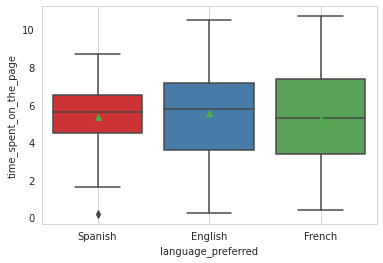

In [ ]:
sns.boxplot(enews["language_preferred"], enews["time_spent_on_the_page"], showmeans=True);
plt.grid()

**Comment**

- The mean time spent on the new page is not the same for different languages.
- English Users spend the most time followed by  French Users and least are Spanish users.
- This was also illustrated on the visualization: ***Landing Page vs Time Spent on the Page***

**Observation/Insight**

- English Users spend most time on the site.

 **STATISTICAL ANALYSIS:**

- Statistical analysis of the signifcance of the variation between the different languages and time spent by the users on different pages will be done Analyzing the Variance.

- Analysis is Of Variance (ANOVA) is done to determine whether there is any significant differences between each language's landing page and the time users spent on it.


landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


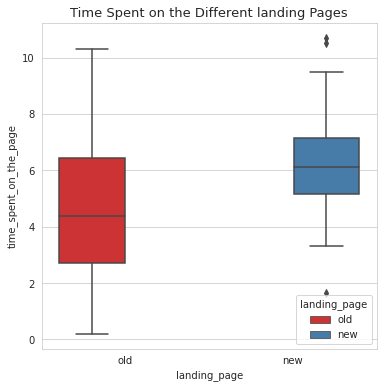

In [ ]:
# mean values for the time spent on different landing pages
print(enews.groupby("landing_page")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "landing_page", y = 'time_spent_on_the_page' , data = enews, hue = 'landing_page')
a.set_title("Time Spent on the Different landing Pages", fontsize=13)
plt.show()

**Comment**
- The mean time spent on the site by the users of the new landing page is greater than that of the old page.
- **Average time spend on the site are 6.22mins and 4.53 for the users on the new and old landing page respectively**
- The new landing page contains outliers which are greater than the maximum time of the time spent on the old page.
- the minimum time are **new page: 1.65mins** and **old page : 0.19mins**.

**Checking for the normality and equality of variance assumptions need to be checked.** 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The mean time for all languages are the same

against the alternative hypothesis

>$H_a:$ The mean time for all languages are not the same

In [ ]:
# Assumption Normality

# find the p-value
w, p_value = stats.shapiro(enews['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption Homogeneity of Variance

# find the p-value
statistic, p_value = stats.levene(enews[enews['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            enews[enews['language_preferred']=='English']['time_spent_on_the_page'],
                            enews[enews['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.06515086840327314


In [ ]:
reject_or_not(0.06515086840327314)

SInce the p-value 0.06515086840327314 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p-value is greater than the aplha level, we fail reject the null hypothesis of homogeneity of variances.

In [ ]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(enews[enews["language_preferred"]=="Spanish"]["time_spent_on_the_page"],
enews[enews["language_preferred"]=="English"]["time_spent_on_the_page"],
enews[enews["language_preferred"]=="French"]["time_spent_on_the_page"],
                              )
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


In [ ]:
reject_or_not(0.8665610536012648)

SInce the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


**Observation/Insight**

As the p-value is greater than the significance level, we fail reject the null hypothesis. Hence, we do have enough statistical significance to conclude that  at least one of the mean time spent on the different languages landing page is different from the rest at 5% significance level.


# CONCLUSION

- The new landing page converted more 12 more users than the old landing page.
- The new landing page has 66% chance of converting users
- The old landing page has 42% conversion users rate
- Most users preferred the english version of the site
- Most subscribers are English natives/speakers
- Users prefer the new landing page
- They spend more time on the new landing page
- The mean time spent on the new page is not the same for all languages.
- English Users spend the most time followed by French Users and least are Spanish users
- Most users preferred the english version of the site
- Most subscribers are English natives/speakers
- the treatment group spend the most time on the site.
- They spend a maximum time greater than the Users on the Control group


# RECOMMENDATION

- Try to incorporate the features on the new landing page on the old to page to increase future users conversion on the old page.
- Invest more on the new landing page.
- Accept the new landing page for campaigns and other business needs.
- Focus massively on english and french subcribers
- Incorporate strategies to convince spanish subscribers to use the new page more.